# Data Visualization

## Bar Plot

In [2]:
import seaborn as sns

diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
from pandas.api.types import CategoricalDtype

df.cut = df.cut.astype(CategoricalDtype(ordered = True))

cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

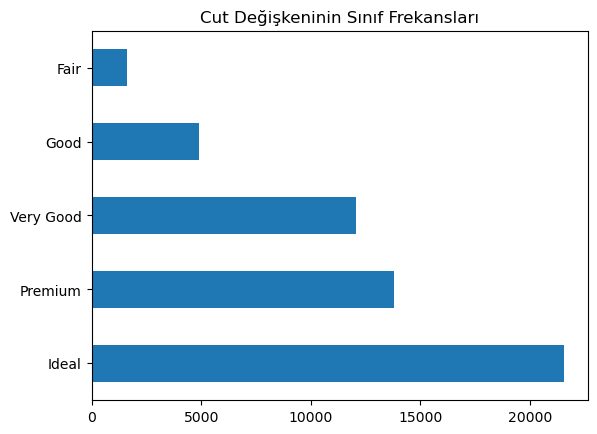

In [8]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

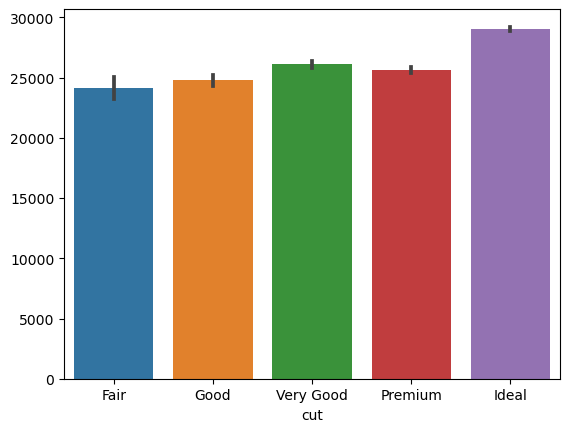

In [10]:
sns.barplot(x = "cut", y = df.cut.index, data = df );

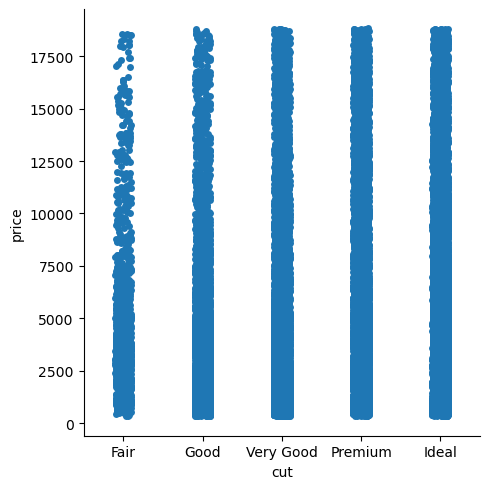

In [11]:
sns.catplot( x = "cut", y = "price",data = df );

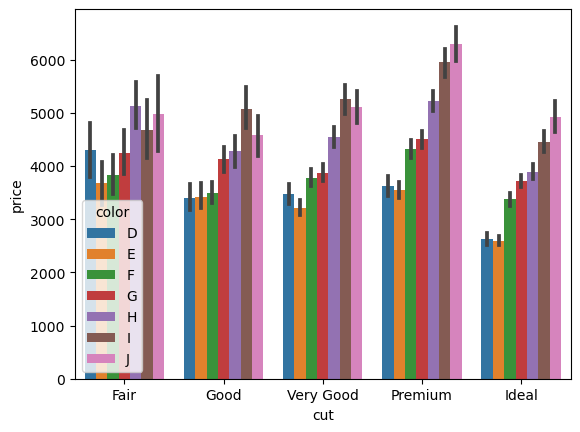

In [16]:
sns.barplot(x = "cut", y = "price", hue = "color", data = df);

# siyah çubuk == std
# price'in afrklı olmasının nedeni sns'in 3 argümanı anlamlı kılması için yaptığı ingirgeme(mean)


In [19]:
# grafiği doğrulama

df.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

## Histogram ve Yoğunluk Grafiği

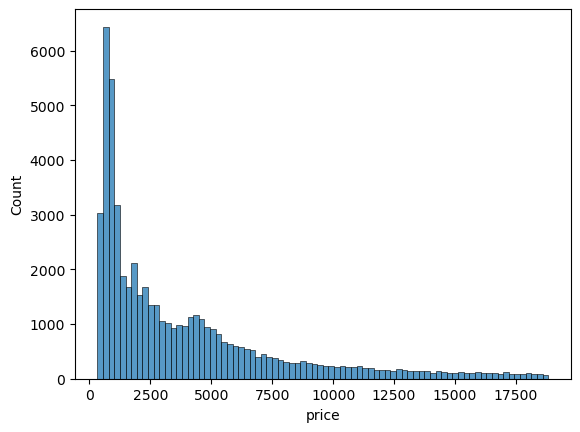

In [24]:
sns.histplot(df.price,  kde = False);

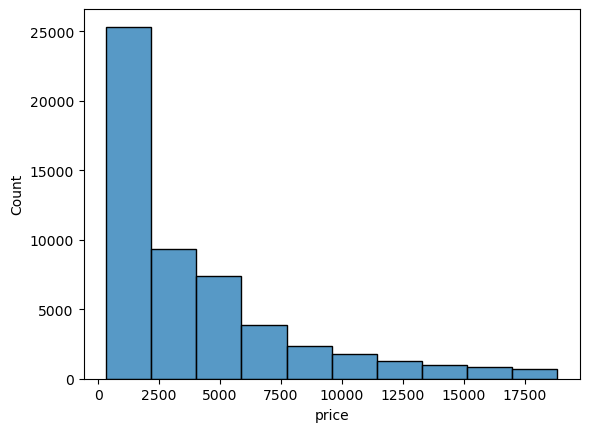

In [27]:
sns.histplot(df.price, bins = 10, kde = False);

/var/folders/4b/qn8w6zs57q10jhr2bqqzljnw0000gn/T/ipykernel_29672/689887770.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price);


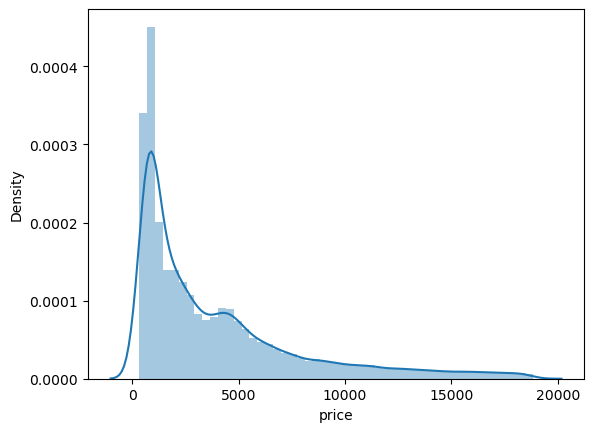

In [29]:
sns.distplot(df.price);

/var/folders/4b/qn8w6zs57q10jhr2bqqzljnw0000gn/T/ipykernel_29672/2995674905.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price, hist = False);


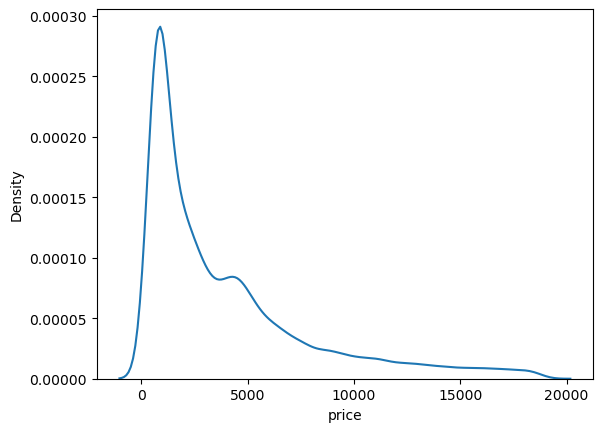

In [31]:
sns.distplot(df.price, hist = False);

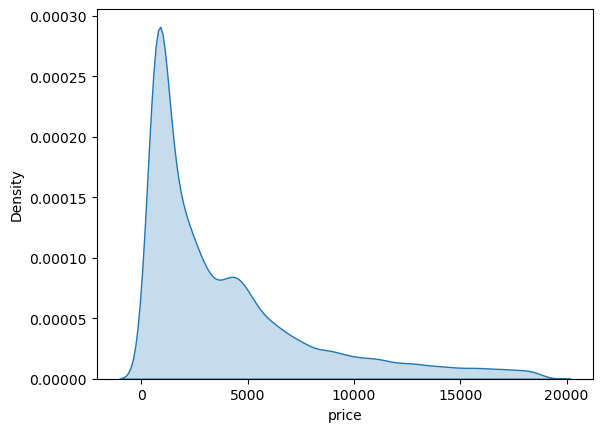

In [33]:
sns.kdeplot(df.price, fill = True);

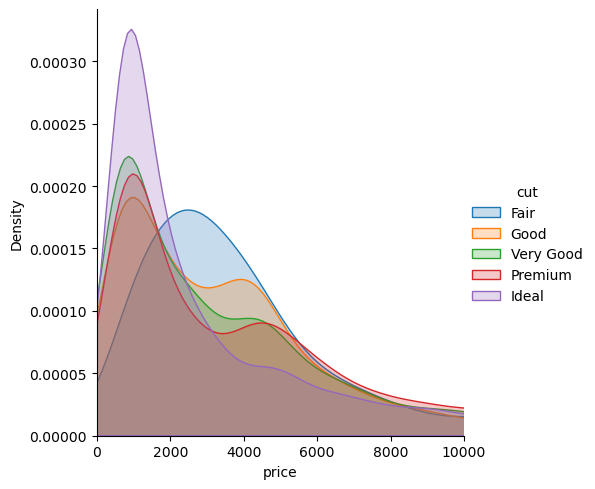

In [35]:
(sns
 .FacetGrid(df,
              hue = "cut",
              height = 5,
              xlim = (0,10000),)
.map(sns.kdeplot, "price", fill = True)
.add_legend()
);

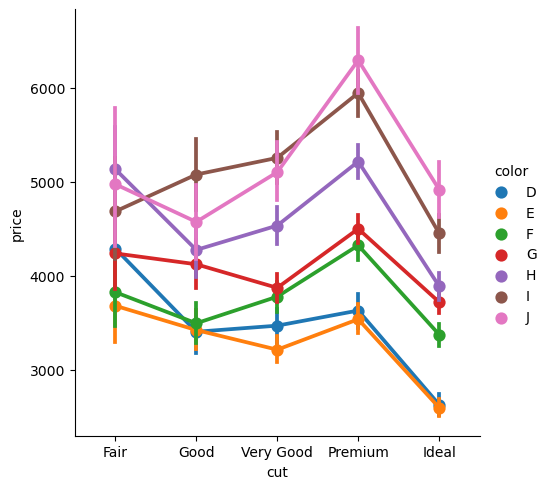

In [36]:
sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

## Box Plot 

In [37]:
import seaborn as sns

tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [40]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [41]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [42]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [43]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

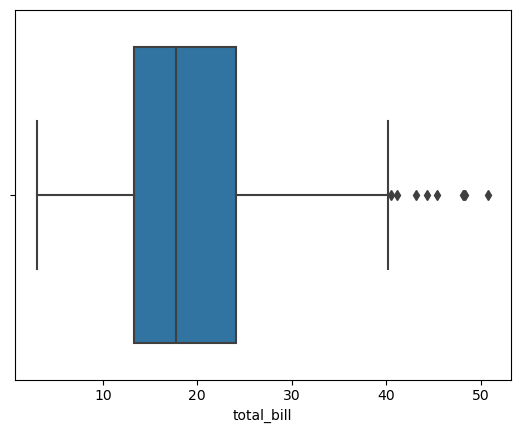

In [48]:
sns.boxplot(x = df["total_bill"]);

In [49]:
# Hangi günler daha fazla kazanıyoruz

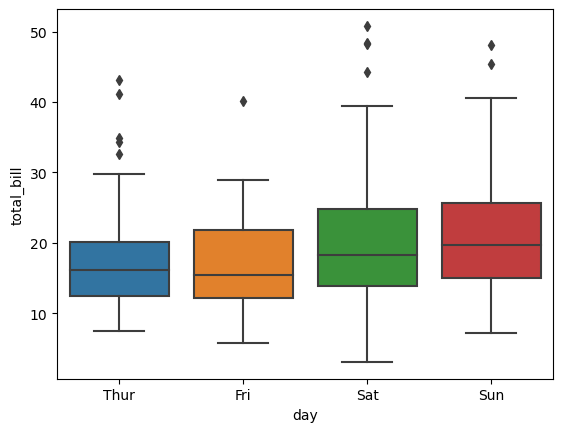

In [50]:
sns.boxplot(x = "day", y = "total_bill", data = df);

In [51]:
# Sabah mı akşam mı daha çok kazannıyoruz

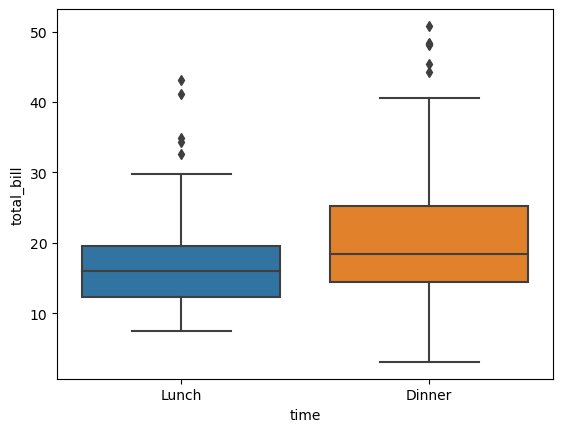

In [52]:
sns.boxplot(x = "time", y = "total_bill", data = df);

In [53]:
# kişi sayısı kazanç

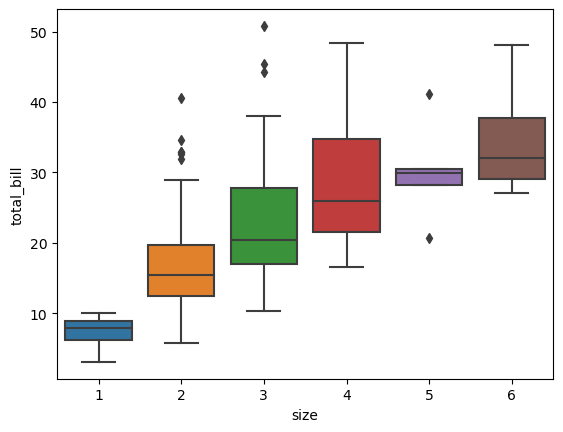

In [54]:
sns.boxplot(x = "size", y = "total_bill", data = df);

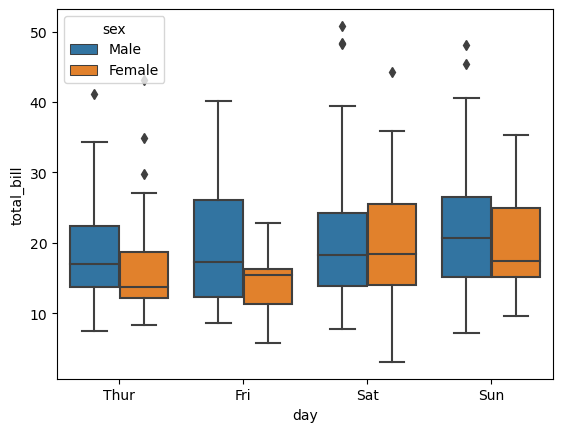

In [55]:
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df);

## Violin Graph

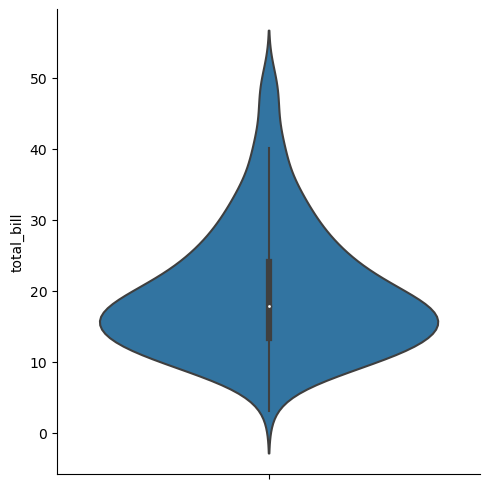

In [56]:
sns.catplot(y = "total_bill", kind = "violin", data = df);

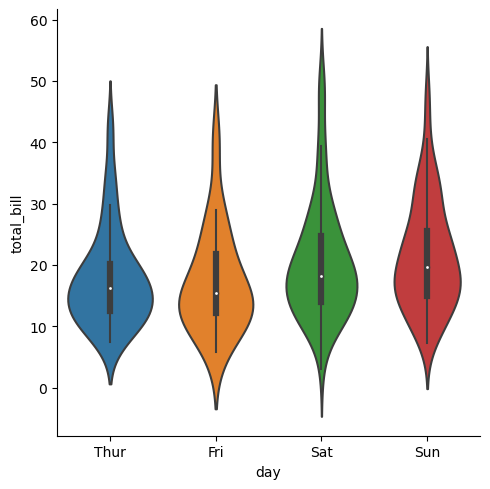

In [57]:
sns.catplot(x = "day", y = "total_bill", kind = "violin", data = df);

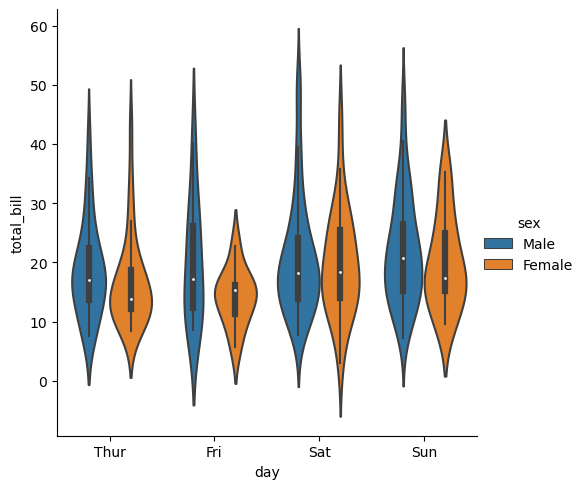

In [58]:
sns.catplot(x = "day", y = "total_bill", hue = "sex", kind = "violin", data = df);

## Korelasyon Grafikleri

## Scatter Plot

In [60]:
import seaborn as sns

tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


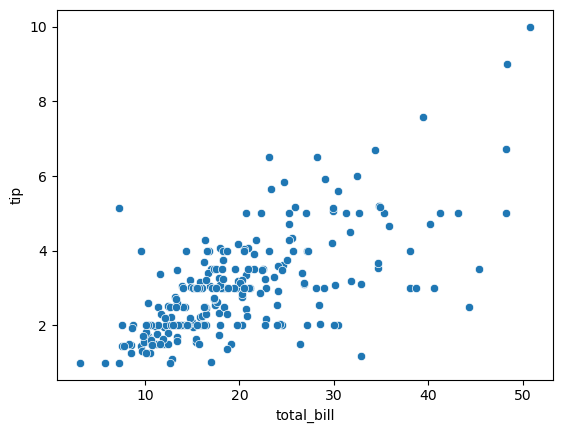

In [62]:
sns.scatterplot(x = "total_bill", y = "tip", data = df);

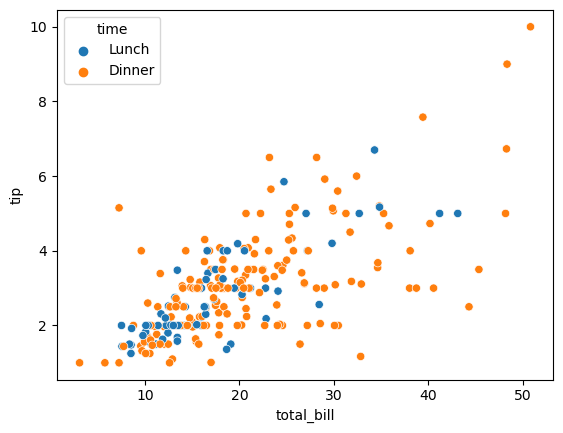

In [63]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", data = df);

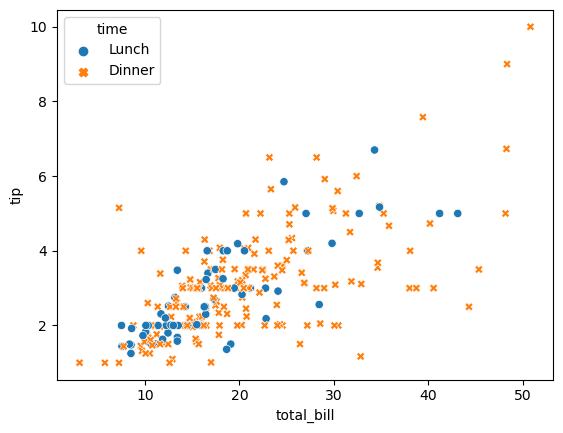

In [64]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "time", style = "time", data = df);

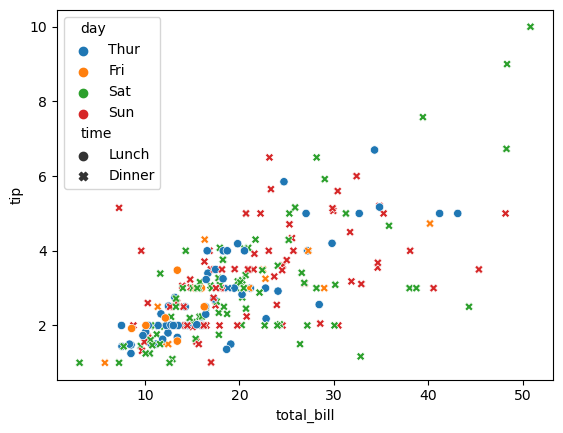

In [65]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "time", data = df);

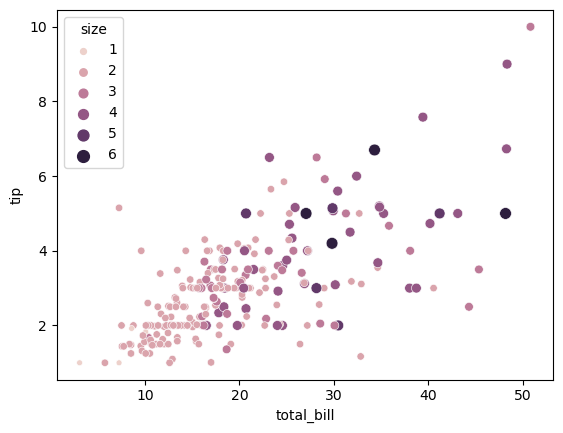

In [67]:
sns.scatterplot(x = "total_bill", y = "tip", hue = "size", size = "size", data = df);

## Doğrusal İlişkinin Gösterilmesi

In [68]:
import matplotlib.pyplot as plt

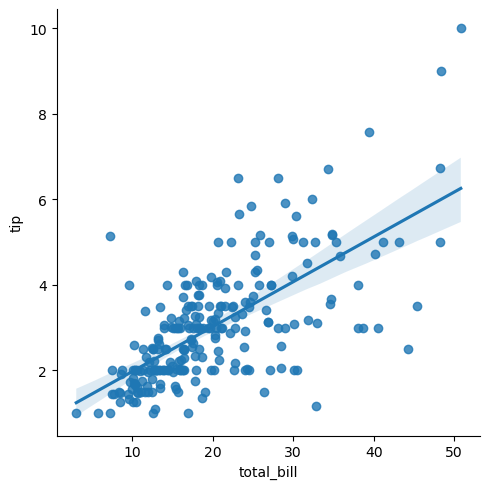

In [69]:
sns.lmplot(x = "total_bill", y = "tip", data = df);

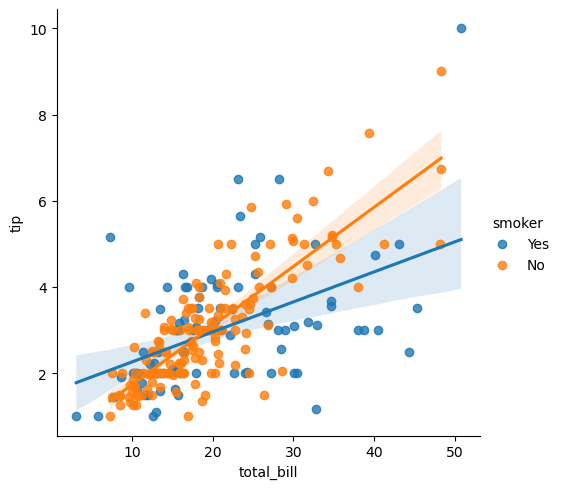

In [70]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = df);

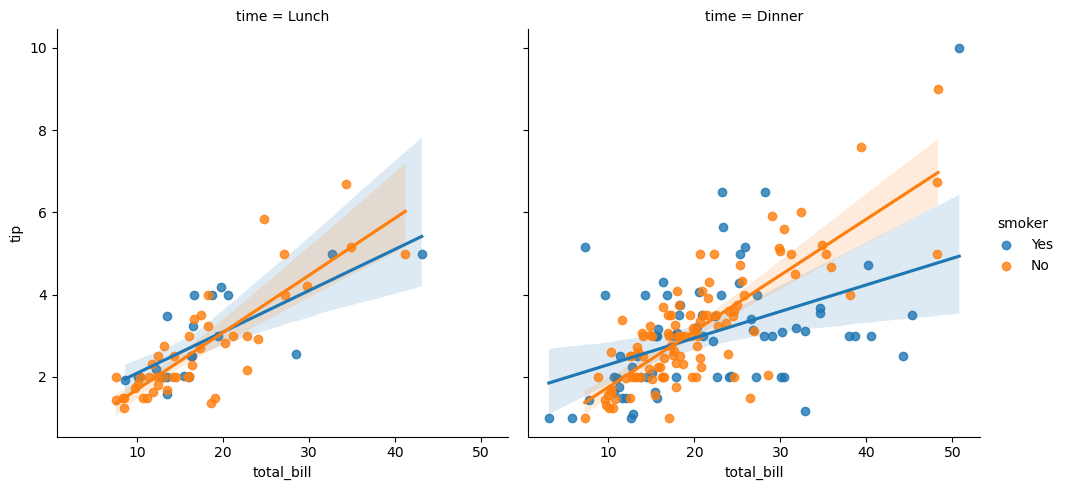

In [71]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = df);

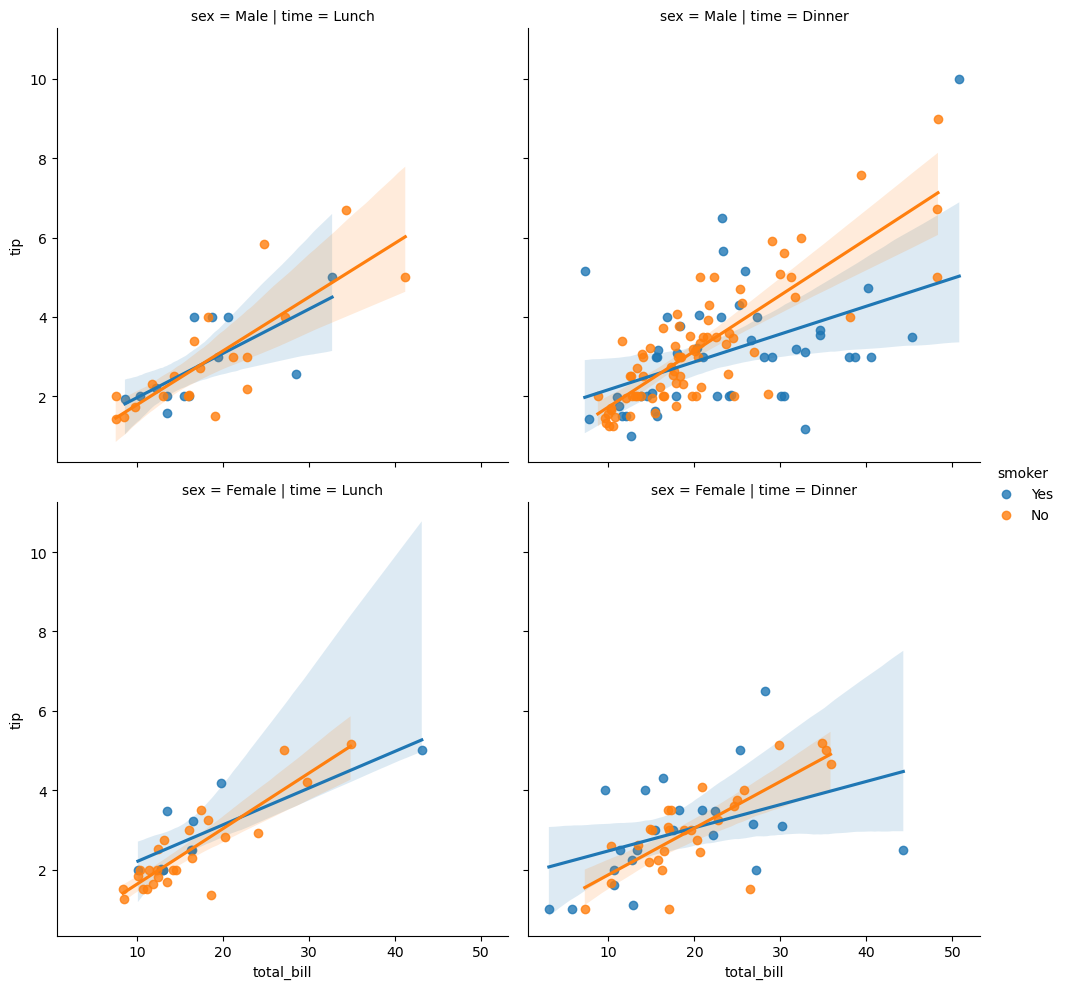

In [73]:
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", data = df);

## Scatter Plot Matrisi

In [74]:
import seaborn as sns

iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


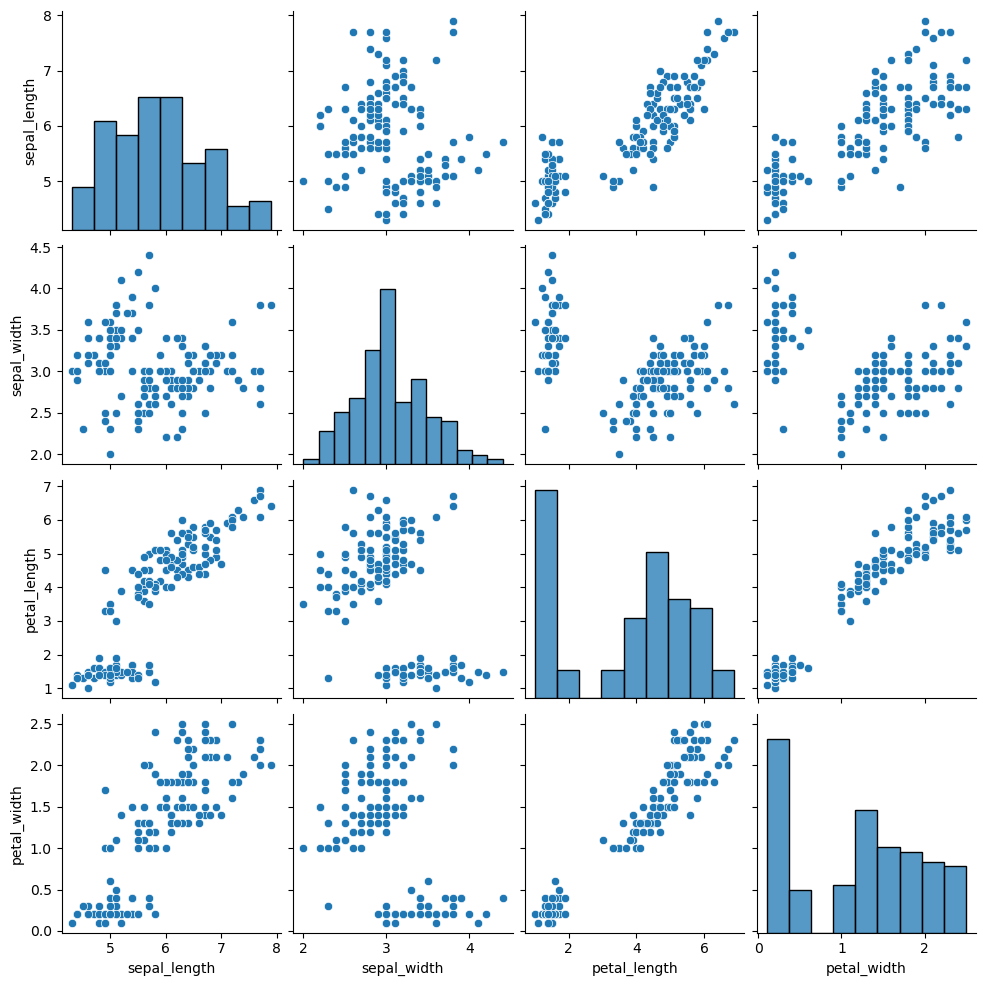

In [79]:
sns.pairplot(df);

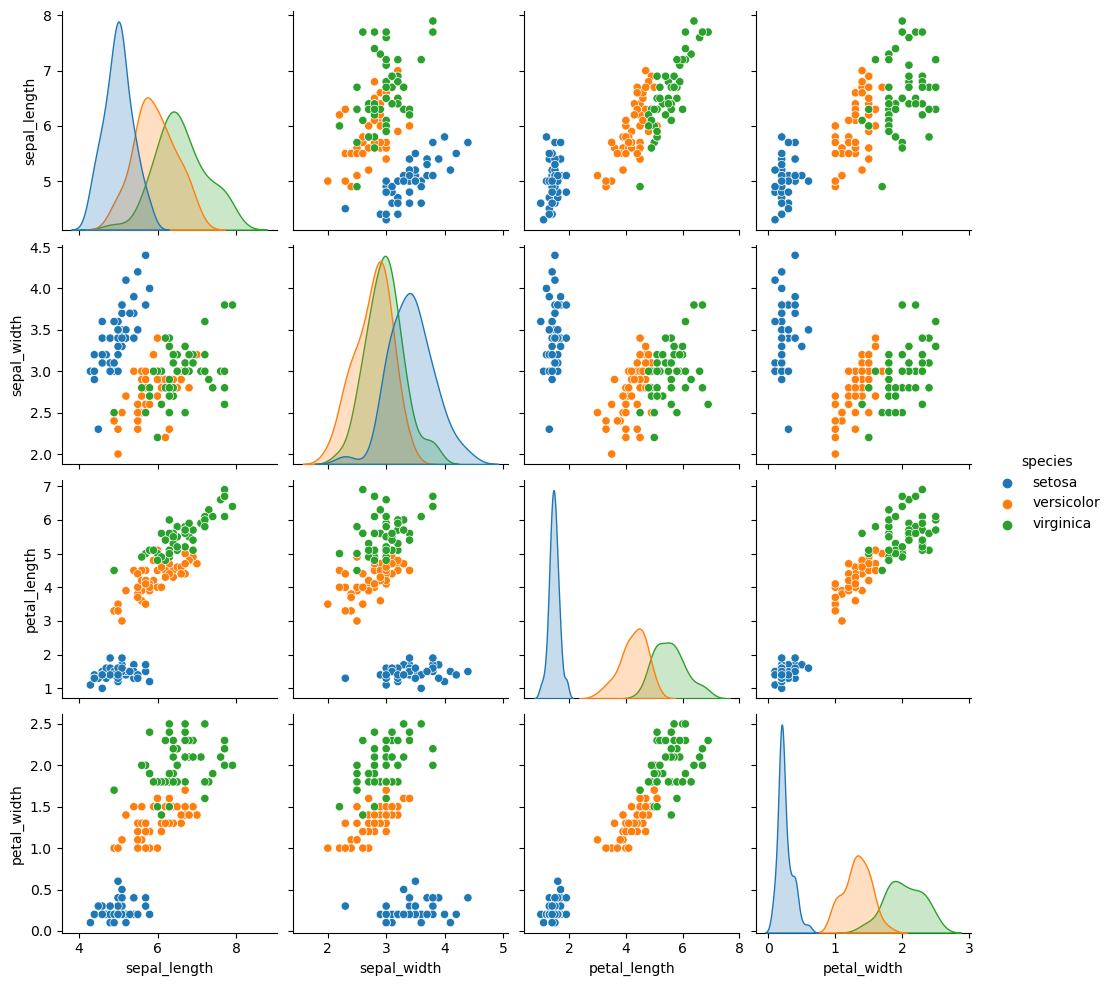

In [80]:
sns.pairplot(df, hue = "species");

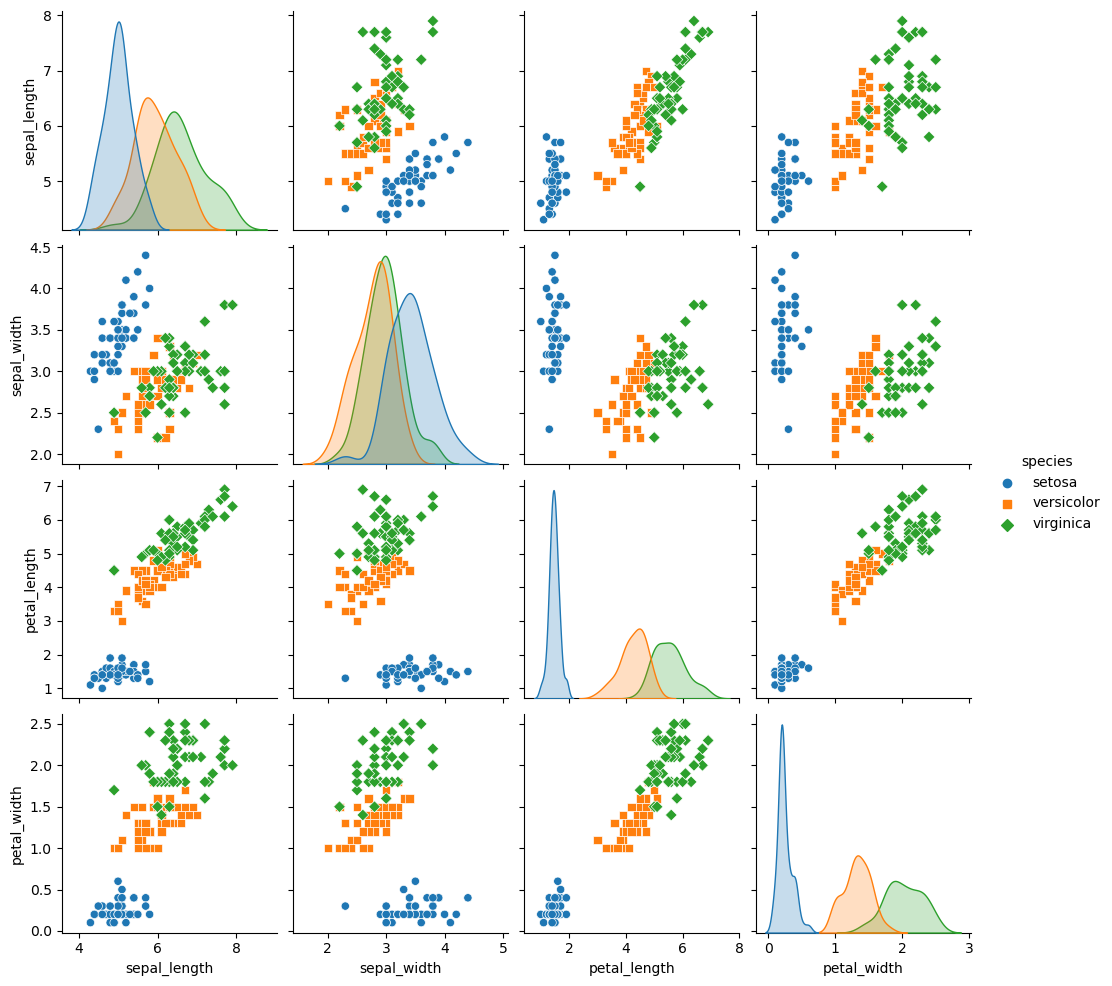

In [81]:
sns.pairplot(df, hue = "species", markers = ["o","s","D"]);

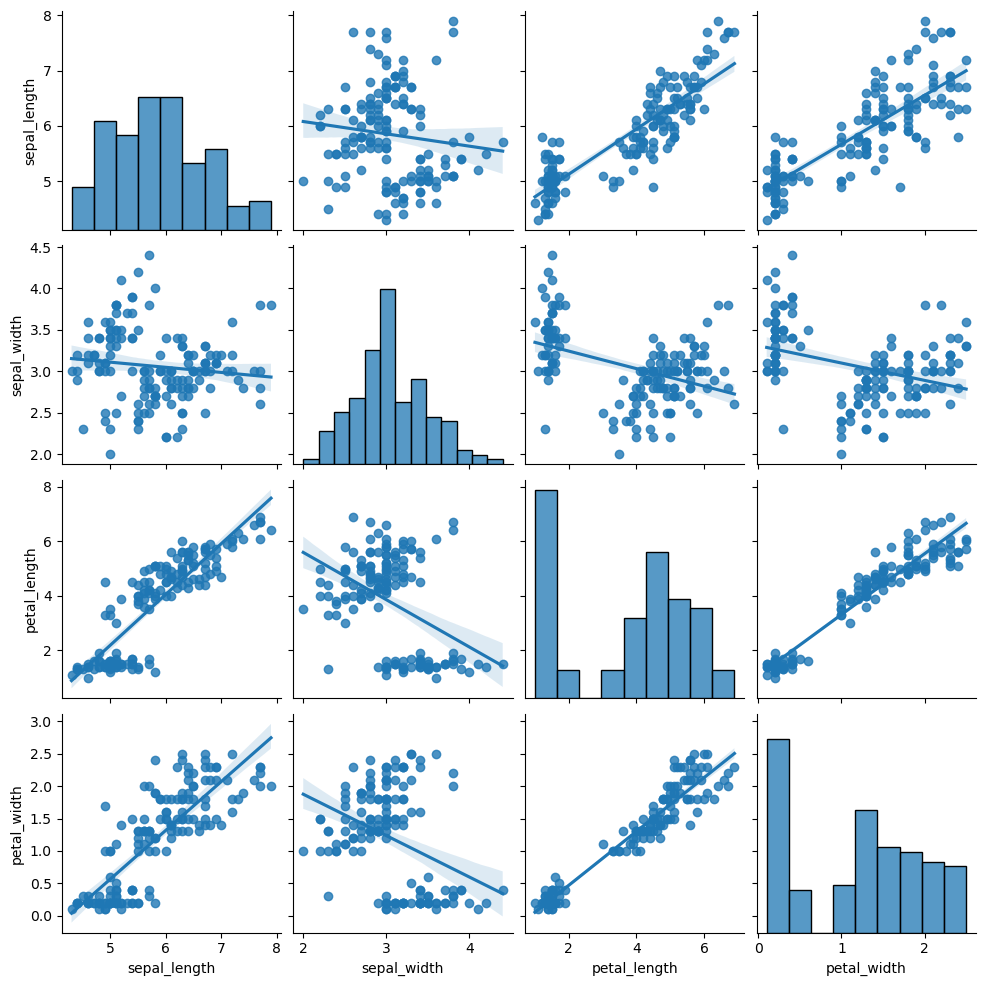

In [86]:
sns.pairplot(df, kind = "reg");

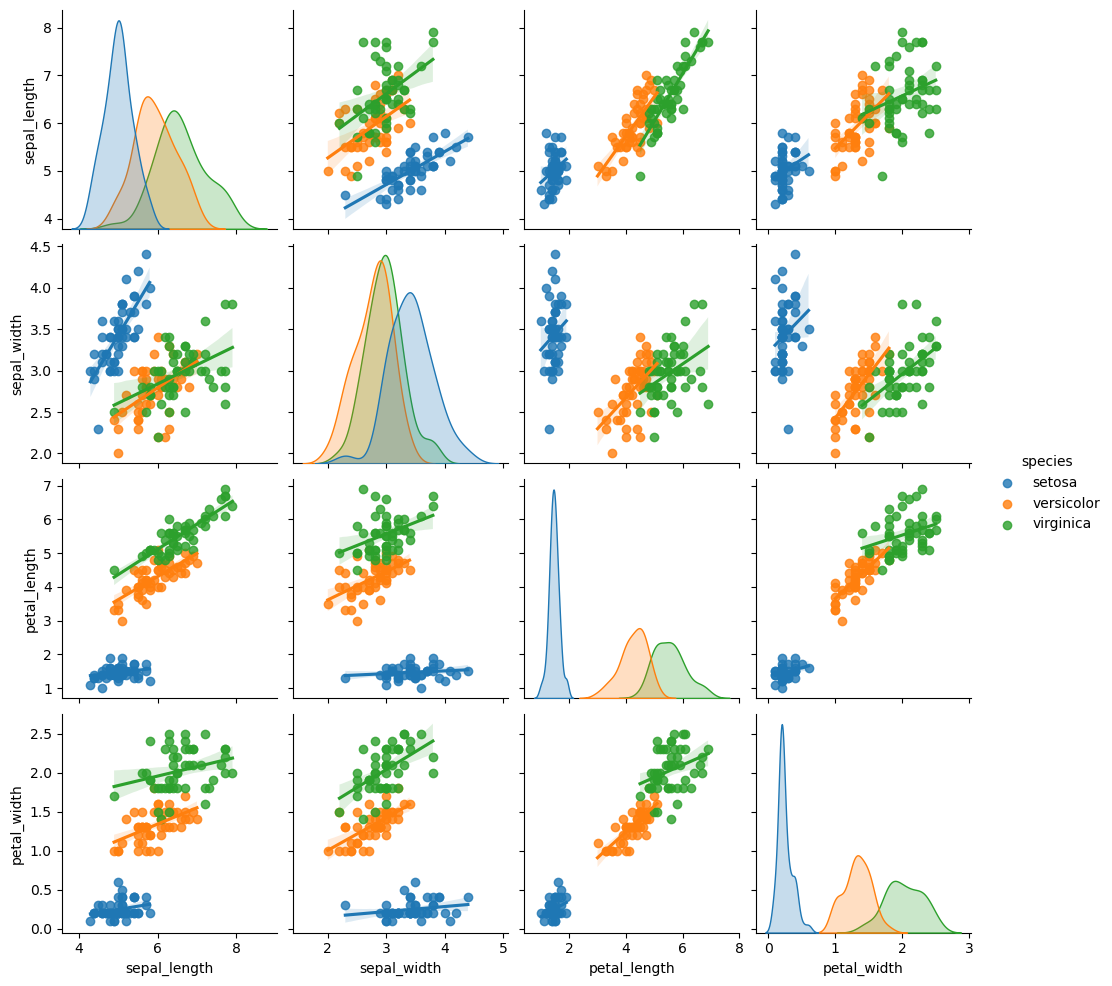

In [85]:
sns.pairplot(df, hue = "species", kind = "reg");

## Heat Map

In [111]:
import seaborn as sns
import pandas as pd

flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [112]:
df = df.pivot("month", "year", "passengers");
df

/var/folders/4b/qn8w6zs57q10jhr2bqqzljnw0000gn/T/ipykernel_29672/4120043781.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df = df.pivot("month", "year", "passengers");


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


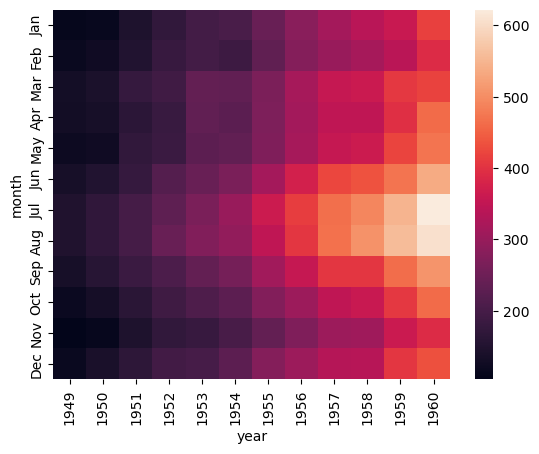

In [113]:
sns.heatmap(df);

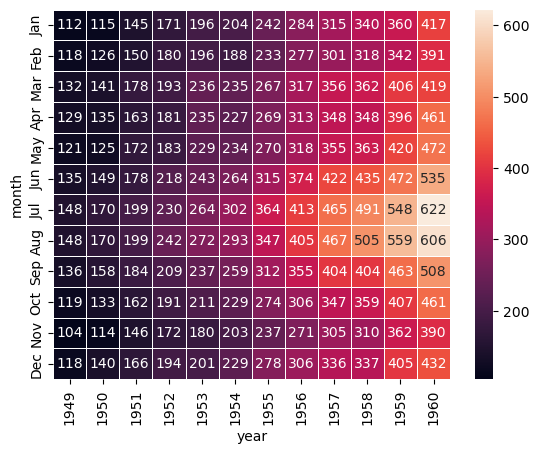

In [115]:
sns.heatmap(df, annot = True, fmt = "d", linewidth = .5);

## Line Grafik

In [120]:
import seaborn as sns

fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


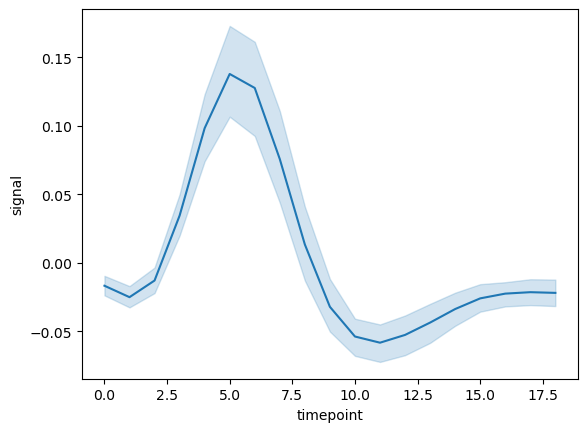

In [123]:
sns.lineplot(x =  "timepoint", y = "signal", data = df);

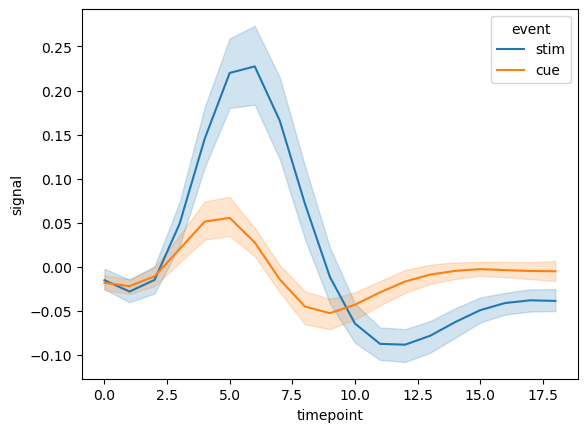

In [124]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df);

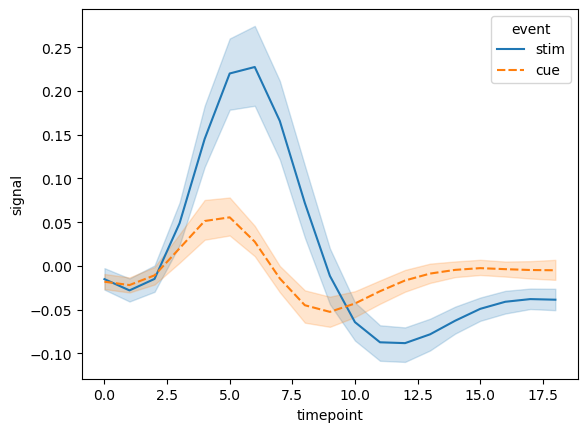

In [125]:
sns.lineplot(x = "timepoint", y = "signal", hue = "event", style = "event", data = df);

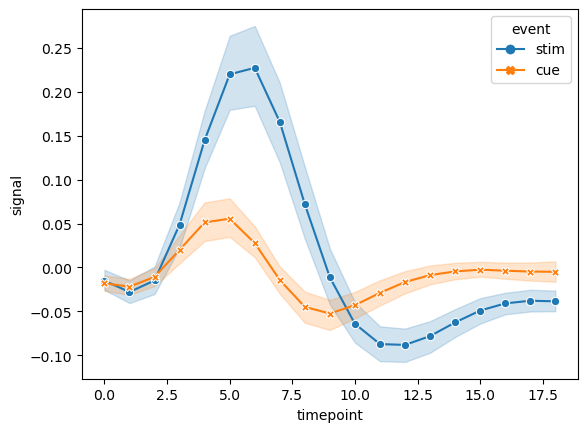

In [126]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "event", 
             style = "event", 
             markers = True,  dashes = False, data = df);

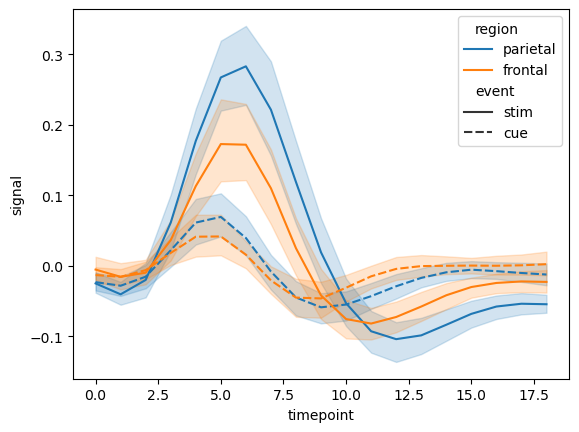

In [127]:
sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "region", 
             style = "event", 
             data = df);